In [2]:
from students_matching import StudentsMatching
import pandas as pd
import random
import warnings

warnings.filterwarnings("ignore")

### Профили:
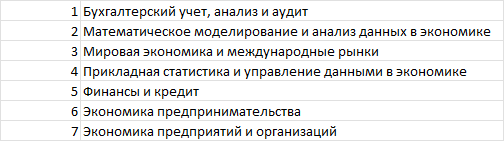

### Дисциплины:
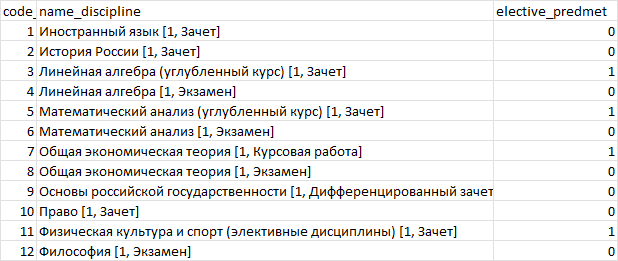

### Оценки:
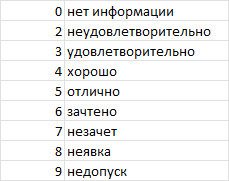


In [3]:
st_priorities = pd.read_excel('Студенты.xlsx', sheet_name=0)

In [4]:
for i in range(1, 8):
    st_priorities[f'alg {i}'] = st_priorities[i] - 1

In [5]:
st_marks = pd.read_excel('Студенты.xlsx', sheet_name=1)
st_marks = st_marks.drop([3, 5, 7, 11], axis=1)

In [6]:
st_rating = pd.read_excel('Студенты.xlsx', sheet_name=2)
st_rating = st_rating.drop([3, 5, 7, 11], axis=1)

In [11]:
# Создание нужного датасета
data_s = pd.DataFrame()

data_s['id_stud'] = st_priorities['id_stud']

data_s['preferences'] = st_priorities[['alg 1', 'alg 2', 'alg 3', 'alg 4', 'alg 5', 'alg 6', 'alg 7']].values.tolist()

data_s['target'] = st_priorities.apply(
    lambda row: 1 if len(set(row[[1, 2, 3, 4, 5, 6, 7]].dropna())) == 1 else 0, axis=1
)

data_s['contract'] = st_priorities['type'].apply(lambda x: 1 if x == 'Договор' else 0)

columns_to_check = [1, 2, 4, 6, 8, 9, 10, 12]
debt_count = st_marks[columns_to_check].isin([0, 2, 7, 8, 9]).sum(axis=1)

data_s['debts'] = debt_count
data_s['rating'] = st_rating[[1, 2, 4, 6, 8, 9, 10, 12]].sum(axis=1)

In [12]:
data_s

,id_stud,preferences,target,contract,debts,rating
0,625928,"[6, 0, 4, 2, 1, 5, 3]",0,1,0,734
1,626530,"[2, 0, 4, 1, 3, 5, 6]",0,1,0,702
2,628791,"[2, 0, 6, 3, 1, 5, 4]",0,0,0,730
3,629481,"[5, 0, 6, 1, 3, 4, 2]",0,1,0,716
4,629681,"[2, 0, 6, 3, 1, 4, 5]",0,0,0,704
...,...,...,...,...,...,...
429,637485,"[6, 2, 3, 1, 0, 5, 4]",0,1,4,325
430,637701,"[0, 0, 0, 0, 0, 0, 0]",1,1,5,304
431,638181,"[1, 5, 0, 6, 2, 4, 3]",0,0,2,493
432,638321,"[3, 5, 0, 6, 2, 4, 1]",0,1,3,410


### Привели датасет к тому виду, который нужен в алгоритме. Задаём параметры и запускаем алгоритм.

In [122]:
num_students = data_s.shape[0]
num_profiles = 7

min_num_groups = [0, 0, 0, 0, 0, 0, 0]
max_num_groups = [4, 2, 3, 2, 9, 3, 2]
max_group_sizes = [25, 20, 27, 25, 27, 22, 20]
min_group_sizes = [20, 18, 23, 25, 25, 20, 18]

perc_of_target = data_s['target'].sum()/data_s.shape[0]
perc_of_contract = data_s['contract'].sum()/data_s.shape[0]

debts_limit = 5
first_pref = 60
first_pref_target = 5

In [123]:
matching = StudentsMatching(num_students, num_profiles, perc_of_target,
                            perc_of_contract, debts_limit, first_pref, first_pref_target,
                            min_num_groups, max_num_groups, min_group_sizes, max_group_sizes)

In [124]:
matching.data_s = data_s

In [125]:
for student in matching.data_s.index:
    if (matching.data_s['debts'][student] > debts_limit) & (matching.data_s['target'][student] == 0):
        matching.data_s['preferences'][student] = []
matching.data_s

,id_stud,preferences,target,contract,debts,rating
0,625928,"[6, 0, 4, 2, 1, 5, 3]",0,1,0,734
1,626530,"[2, 0, 4, 1, 3, 5, 6]",0,1,0,702
2,628791,"[2, 0, 6, 3, 1, 5, 4]",0,0,0,730
3,629481,"[5, 0, 6, 1, 3, 4, 2]",0,1,0,716
4,629681,"[2, 0, 6, 3, 1, 4, 5]",0,0,0,704
...,...,...,...,...,...,...
429,637485,"[6, 2, 3, 1, 0, 5, 4]",0,1,4,325
430,637701,"[0, 0, 0, 0, 0, 0, 0]",1,1,5,304
431,638181,"[1, 5, 0, 6, 2, 4, 3]",0,0,2,493
432,638321,"[3, 5, 0, 6, 2, 4, 1]",0,1,3,410


In [126]:
matching.generate_profile_preferences()
matching.calculate_mandatory_profiles()
matching.fill_reserve()

In [127]:
for prof in matching.data_p.index:
    print(f"Профиль {prof+1}: Студенты, поставившие первым приоритетом: {matching.priorities[prof]}, "
          f"целевиков: {matching.priorities_target[prof]}")

print(f"Размер резерва студентов: {matching.reserve_size}")
print(f"Резерв студентов: {matching.reserve_students}")

Профиль 1: Студенты, поставившие первым приоритетом: 76, целевиков: 49
Профиль 2: Студенты, поставившие первым приоритетом: 33, целевиков: 0
Профиль 3: Студенты, поставившие первым приоритетом: 50, целевиков: 0
Профиль 4: Студенты, поставившие первым приоритетом: 49, целевиков: 0
Профиль 5: Студенты, поставившие первым приоритетом: 76, целевиков: 0
Профиль 6: Студенты, поставившие первым приоритетом: 63, целевиков: 0
Профиль 7: Студенты, поставившие первым приоритетом: 76, целевиков: 0
Размер резерва студентов: 83
Резерв студентов: [256, 254, 388, 205, 62, 105, 224, 115, 207, 162, 136, 118, 233, 183, 121, 333, 387, 270, 303, 249, 346, 395, 351, 369, 264, 144, 365, 280, 322, 130, 341, 405, 424, 432, 241, 401, 201, 167, 225, 426, 106, 327, 232, 171, 178, 282, 157, 182, 368, 208, 381, 348, 128, 338, 191, 429, 317, 357, 174, 109, 222, 117, 116, 179, 255, 141, 120, 197, 343, 60, 107, 300]


In [128]:
matching.gale_shapley(matching.sorted_students)
for prof, matched_students in matching.profiles_matches.items():
    print(f"Профиль {prof+1}: Студенты (по id_stud) - {data_s.iloc[matched_students]['id_stud'].tolist()}")
    print(f"Всего на профиле {prof+1} {len(matched_students)} студентов")

    max_size = matching.data_p.loc[prof, 'max_group_size']
    min_size = matching.data_p.loc[prof, 'min_group_size']
    if len(matched_students) > 0:
        full_groups = len(matched_students) // max_size
        small_groups = len(matched_students) // min_size
        if len(matched_students) % max_size == 0:
            print(f"На профиле {prof+1} можно сформировать {full_groups} полных групп.")
        elif small_groups == full_groups:
            students_to_remove = len(matched_students) % max_size
            students_to_add = min_size - len(matched_students) % min_size
            print(f"Для максимальной заполненности {full_groups} групп профиля {prof+1} выгнать: {students_to_remove}")
            print(f"Для минимальной заполненности {small_groups + 1} групп профиля {prof+1} добавить: {students_to_add}")
        else:
            print(f"Студентов профиля {prof} можно распределить в {small_groups} групп")
            students_needed_to_max = max_size - len(matched_students) % max_size 
            print(f"Не хватает студентов до максимальной заполненности групп для профиля {prof+1}: {students_needed_to_max}")
    else:
        print(f"На профиле {prof+1} нет зачисленных студентов.")

Профиль 1: Студенты (по id_stud) - [633948, 632319, 640244, 629071, 633916, 628754, 637061, 630659, 630726, 629690, 636619, 634084, 636051, 627159, 637377, 637334, 627950, 633169, 639789, 640835, 629684, 639839, 637253, 631783, 630829, 627466, 628930, 629696, 630367, 637114, 636860, 627242, 631547, 638537, 634829, 634462, 638780, 638612, 637701, 634655, 643099, 638573, 626756, 643225, 632291, 630552, 639741, 608680, 616147, 638431, 627643, 627572, 636290, 628657, 629445, 628473, 629421, 629352, 632718, 631168, 637854, 637053, 634002, 627707, 628501, 629430, 636584, 628755, 634367, 627384, 632408, 628136, 630542, 626573, 627555, 629122, 626947, 643052, 630831, 634471, 632429, 627838, 638321, 626551]
Всего на профиле 1 84 студентов
Студентов профиля 0 можно распределить в 4 групп
Не хватает студентов до максимальной заполненности групп для профиля 1: 16
Профиль 2: Студенты (по id_stud) - [629731, 628987, 640024, 635417, 626685, 627536, 631019, 632066, 638108, 634028, 633448, 627708, 6257

In [129]:
print("Незачисленные студенты:")
print(matching.unmatched_students)

Незачисленные студенты:
[110, 114, 134, 151, 193, 214, 266, 271, 377, 410, 413]


In [130]:
matching.calculate_prof_status_and_a()
matching.prof_status

[1, 0, 0, 1, 0, 1, 1]

In [131]:
matching.a

11

In [132]:
matching.preparing_for_redistribution()

есть лишние студенты
студенты к распределению: [300, 107, 60, 343, 110, 114, 134, 151, 193, 214, 266, 271, 377, 410, 413]


In [133]:
matching.data_p

,min_num_groups,max_num_groups,min_group_size,max_group_size,quota,preferences,min_quota
0,1,4,20,25,0,"[39, 390, 47, 411, 359, 376, 297, 246, 315, 35...",20
1,0,2,18,20,2,"[39, 390, 47, 411, 359, 376, 297, 246, 315, 35...",0
2,0,3,23,27,0,"[39, 390, 47, 411, 359, 376, 297, 246, 315, 35...",0
3,0,2,25,25,0,"[39, 390, 47, 411, 359, 376, 297, 246, 315, 35...",0
4,1,9,25,27,9,"[39, 390, 47, 411, 359, 376, 297, 246, 315, 35...",25
5,1,3,20,22,0,"[39, 390, 47, 411, 359, 376, 297, 246, 315, 35...",20
6,1,2,18,20,0,"[39, 390, 47, 411, 359, 376, 297, 246, 315, 35...",18


In [134]:
matching.gale_shapley_redistribution()
matching.random_distribution()
for prof, matched_students in matching.profiles_matches.items():
    print(f"Профиль {prof+1}: Студенты (по id_stud) - {data_s.iloc[matched_students]['id_stud'].tolist()}")
    print(f"Всего на профиле {prof+1} {len(matched_students)} студентов")

    max_size = matching.data_p.loc[prof, 'max_group_size']
    min_size = matching.data_p.loc[prof, 'min_group_size']
    if len(matched_students) > 0:
        full_groups = len(matched_students) // max_size
        small_groups = len(matched_students) // min_size
        if len(matched_students) % max_size == 0:
            print(f"На профиле {prof+1} можно сформировать {full_groups} полных групп.")
        elif small_groups == full_groups:
            students_to_remove = len(matched_students) % max_size
            students_to_add = min_size - len(matched_students) % min_size
            print(f"Для максимальной заполненности {full_groups} групп профиля {prof+1} выгнать: {students_to_remove}")
            print(f"Для минимальной заполненности {small_groups + 1} групп профиля {prof+1} добавить: {students_to_add}")
        else:
            print(f"Студентов профиля {prof+1} можно распределить в {small_groups} групп")
            students_needed_to_max = max_size - len(matched_students) % max_size
            # Обновляем квоту для дальнейшего распределения студентов
            matching.data_p.loc[prof, 'quota'] = students_needed_to_max
            print(f"Не хватает студентов до максимальной заполненности групп для профиля {prof+1}: {students_needed_to_max}")
    else:
        print(f"На профиле {prof+1} нет зачисленных студентов.")

Профиль 1: Студенты (по id_stud) - [633948, 632319, 640244, 629071, 633916, 628754, 637061, 630659, 630726, 629690, 636619, 634084, 636051, 627159, 637377, 637334, 627950, 633169, 639789, 640835, 629684, 639839, 637253, 631783, 630829, 627466, 628930, 629696, 630367, 637114, 636860, 627242, 631547, 638537, 634829, 634462, 638780, 638612, 637701, 634655, 643099, 638573, 626756, 643225, 632291, 630552, 639741, 608680, 616147, 638431, 627643, 627572, 636290, 628657, 629445, 628473, 629421, 629352, 632718, 631168, 637854, 637053, 634002, 627707, 628501, 629430, 636584, 628755, 634367, 627384, 632408, 628136, 630542, 626573, 627555, 629122, 626947, 643052, 630831, 634471, 632429, 627838, 638321, 626551]
Всего на профиле 1 84 студентов
Студентов профиля 1 можно распределить в 4 групп
Не хватает студентов до максимальной заполненности групп для профиля 1: 16
Профиль 2: Студенты (по id_stud) - [629731, 628987, 640024, 635417, 626685, 627536, 631019, 632066, 638108, 634028, 633448, 627708, 6257

In [135]:
matching.data_p

,min_num_groups,max_num_groups,min_group_size,max_group_size,quota,preferences,min_quota
0,1,4,20,25,16,"[39, 390, 47, 411, 359, 376, 297, 246, 315, 35...",20
1,0,2,18,20,4,"[39, 390, 47, 411, 359, 376, 297, 246, 315, 35...",0
2,0,3,23,27,0,"[39, 390, 47, 411, 359, 376, 297, 246, 315, 35...",0
3,0,2,25,25,0,"[39, 390, 47, 411, 359, 376, 297, 246, 315, 35...",0
4,1,9,25,27,8,"[39, 390, 47, 411, 359, 376, 297, 246, 315, 35...",25
5,1,3,20,22,0,"[39, 390, 47, 411, 359, 376, 297, 246, 315, 35...",20
6,1,2,18,20,0,"[39, 390, 47, 411, 359, 376, 297, 246, 315, 35...",18


In [136]:
print("Незачисленные студенты:")
print(matching.unmatched_students)

Незачисленные студенты:
[271, 377, 410, 413]


In [137]:
matching.random_distribution()

In [138]:
for prof, matched_students in matching.profiles_matches.items():
    print(f"Профиль {prof+1}: Студенты (по id_stud) - {data_s.iloc[matched_students]['id_stud'].tolist()}")
    print(f"Всего на профиле {prof+1} {len(matched_students)} студентов")

    max_size = matching.data_p.loc[prof, 'max_group_size']
    min_size = matching.data_p.loc[prof, 'min_group_size']
    if len(matched_students) > 0:
        full_groups = len(matched_students) // max_size
        small_groups = len(matched_students) // min_size
        if len(matched_students) % max_size == 0:
            print(f"На профиле {prof+1} можно сформировать {full_groups} полных групп.")
        elif small_groups == full_groups:
            students_to_remove = len(matched_students) % max_size
            students_to_add = min_size - len(matched_students) % min_size
            print(f"Для максимальной заполненности {full_groups} групп профиля {prof+1} выгнать: {students_to_remove}")
            print(f"Для минимальной заполненности {small_groups + 1} групп профиля {prof+1} добавить: {students_to_add}")
        else:
            print(f"Студентов профиля {prof} можно распределить в {small_groups} групп")
            students_needed_to_max = max_size - len(matched_students) % max_size
            print(f"Не хватает студентов до максимальной заполненности групп для профиля {prof+1}: {students_needed_to_max}")
    else:
        print(f"На профиле {prof+1} нет зачисленных студентов.")

Профиль 1: Студенты (по id_stud) - [633948, 632319, 640244, 629071, 633916, 628754, 637061, 630659, 630726, 629690, 636619, 634084, 636051, 627159, 637377, 637334, 627950, 633169, 639789, 640835, 629684, 639839, 637253, 631783, 630829, 627466, 628930, 629696, 630367, 637114, 636860, 627242, 631547, 638537, 634829, 634462, 638780, 638612, 637701, 634655, 643099, 638573, 626756, 643225, 632291, 630552, 639741, 608680, 616147, 638431, 627643, 627572, 636290, 628657, 629445, 628473, 629421, 629352, 632718, 631168, 637854, 637053, 634002, 627707, 628501, 629430, 636584, 628755, 634367, 627384, 632408, 628136, 630542, 626573, 627555, 629122, 626947, 643052, 630831, 634471, 632429, 627838, 638321, 626551, 630504]
Всего на профиле 1 85 студентов
Студентов профиля 0 можно распределить в 4 групп
Не хватает студентов до максимальной заполненности групп для профиля 1: 15
Профиль 2: Студенты (по id_stud) - [629731, 628987, 640024, 635417, 626685, 627536, 631019, 632066, 638108, 634028, 633448, 6277

In [139]:
print("Незачисленные студенты:")
print(matching.unmatched_students)

Незачисленные студенты:
[]


In [140]:
matching.completeness_quota()

на профиле 0 студентов можно добавить  до 100
на профиле 1 студентов можно добавить  до 40
на профиле 2 студентов можно добавить  до 54
на профиле 3 студентов можно добавить  до 50
на профиле 4 студентов можно добавить  до 108
на профиле 5 студентов можно добавить  до 66
на профиле 6 студентов можно добавить  до 40


In [141]:
matching.data_p

,min_num_groups,max_num_groups,min_group_size,max_group_size,quota,preferences,min_quota
0,1,4,20,25,15,"[39, 390, 47, 411, 359, 376, 297, 246, 315, 35...",20
1,0,2,18,20,2,"[39, 390, 47, 411, 359, 376, 297, 246, 315, 35...",0
2,0,3,23,27,0,"[39, 390, 47, 411, 359, 376, 297, 246, 315, 35...",0
3,0,2,25,25,0,"[39, 390, 47, 411, 359, 376, 297, 246, 315, 35...",0
4,1,9,25,27,7,"[39, 390, 47, 411, 359, 376, 297, 246, 315, 35...",25
5,1,3,20,22,0,"[39, 390, 47, 411, 359, 376, 297, 246, 315, 35...",20
6,1,2,18,20,0,"[39, 390, 47, 411, 359, 376, 297, 246, 315, 35...",18


In [142]:
matching.random_distribution()
print("Незачисленные студенты:")
print(matching.unmatched_students)

Незачисленные студенты:
[]
